In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import json

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def get_results():
  n_estimators = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  n = 50
  X,y = load_wine(return_X_y=True)
  while(n <= 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    y_pred = GradientBoostingClassifier(n_estimators= n,random_state=28).fit(X_train, y_train).predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='micro'))
    recall.append(recall_score(y_test, y_pred, average='micro'))
    f1.append(f1_score(y_test, y_pred, average='micro'))
    n_estimators.append(n)
    n += 10
  return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1":f1, "n_estimators": n_estimators}

In [3]:
results = get_results()

In [4]:
with open('metrics.json', 'r') as f:
    data = json.load(f)

data["boosting"] = results  

with open('metrics.json', 'w') as f:
  json.dump(data, f) 

In [5]:
def draw_results(results):
  accuracy = results['accuracy']
  precision = results['precision']
  recall = results['recall']
  f1 = results['f1']
  n_estimators = results['n_estimators']
  
  fig, ax = plt.subplots(2, 2, figsize = (15, 13))

  bayesian_test_sizes = [i * 250 for i in data["bayesian"]["test_sizes"]]
  tree_test_sizes = [i * 250 for i in data["decision_tree"]["test_sizes"]]

  ax[0, 0].plot(n_estimators, accuracy)
  ax[0, 0].plot(data["random_forest"]["n_estimators"],data["random_forest"]["accuracy"])
  ax[0, 0].plot(data["bagging"]["n_estimators"],data["bagging"]["accuracy"])
  ax[0, 0].plot(bayesian_test_sizes,data["bayesian"]["accuracy"])
  ax[0, 0].plot(tree_test_sizes,data["decision_tree"]["accuracy"])
  ax[0, 0].legend(['boosting', 'random_forest', 'bagging', 'bayesian', 'decision_tree'])
  ax[0, 0].set_title('Accuracy scores')
  ax[0, 0].set(xlabel = 'Количество участников ансамбля')

  ax[0, 1].plot(n_estimators, precision)
  ax[0, 1].plot(data["random_forest"]["n_estimators"],data["random_forest"]["precision"])
  ax[0, 1].plot(data["bagging"]["n_estimators"],data["bagging"]["precision"])
  ax[0, 1].plot( bayesian_test_sizes,data["bayesian"]["precision"])
  ax[0, 1].plot(tree_test_sizes,data["decision_tree"]["precision"])
  ax[0, 1].legend(['boosting', 'random_forest', 'bagging', 'bayesian', 'decision_tree'])
  ax[0, 1].set_title('Precision scores')
  ax[0, 1].set(xlabel = 'Количество участников ансамбля')

  ax[1, 0].plot(n_estimators, recall)
  ax[1, 0].plot(data["random_forest"]["n_estimators"],data["random_forest"]["recall"])
  ax[1, 0].plot(data["bagging"]["n_estimators"],data["bagging"]["recall"])
  ax[1, 0].plot( bayesian_test_sizes,data["bayesian"]["recall"])
  ax[1, 0].plot(tree_test_sizes,data["decision_tree"]["recall"])
  ax[1, 0].legend(['boosting', 'random_forest', 'bagging', 'bayesian', 'decision_tree'])
  ax[1, 0].set_title('Recall scores')
  ax[1, 0].set(xlabel = 'Количество участников ансамбля')

  ax[1, 1].plot(n_estimators, f1)
  ax[1, 1].plot(data["random_forest"]["n_estimators"],data["random_forest"]["f1"])
  ax[1, 1].plot(data["bagging"]["n_estimators"],data["bagging"]["f1"])
  ax[1, 1].plot( bayesian_test_sizes,data["bayesian"]["f1"])
  ax[1, 1].plot(tree_test_sizes,data["decision_tree"]["f1"])
  ax[1, 1].legend(['boosting', 'random_forest', 'bagging', 'bayesian', 'decision_tree'])
  ax[1, 1].set_title('F1 scores')
  ax[1, 1].set(xlabel = 'Количество участников ансамбля')
  plt.show()

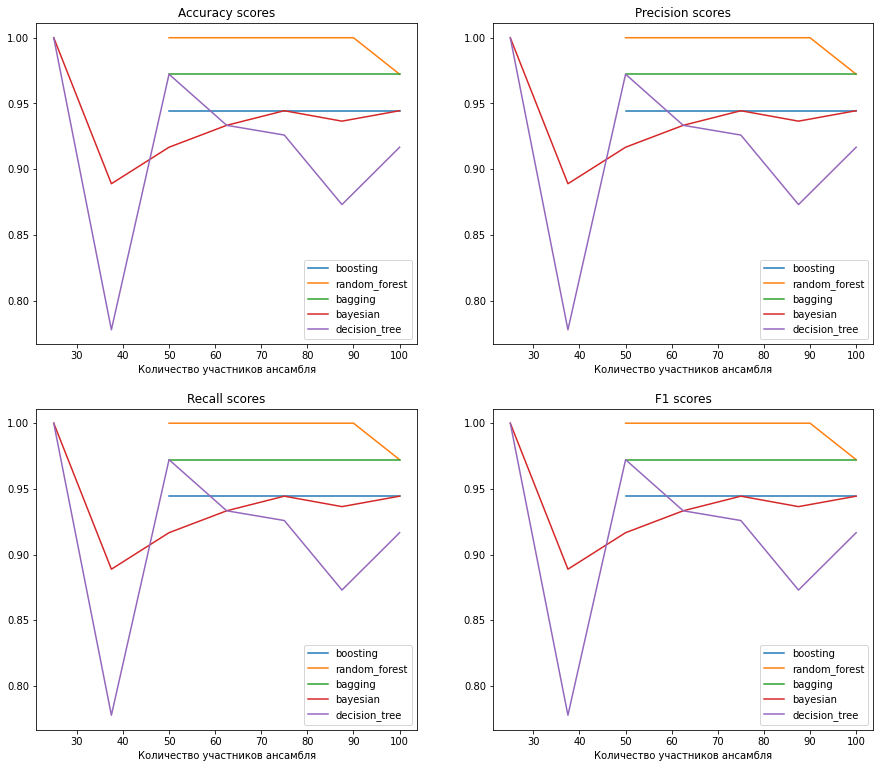

In [6]:
draw_results(results)